## Pandas (Working  Time Series - Seattle Bycicle counts)

Ejemplo de series de fechas, utilizando datos de un contador de bicicletas automático, instalado al final del 2012 en el puente Fremont, a ambos lados de la calzada. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Cargamos el df con los datos 
data = pd.read_csv('Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv', index_col='Date', parse_dates=True
                  )

In [3]:
# Echamos un vistazo
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [4]:
data.shape

(51072, 2)

In [5]:
# Cambiamos el nombre a las columnas, para hacerlas más manejables
data.columns = ['West', 'East']

In [6]:
# Creamos una columna de tráfico acumulado
data['Total'] = data['West'] + data['East']

In [7]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [8]:
# Echamos un vistazo a las estadísticas generales
data.dropna().describe()

,West,East,Total
count,51063.000000,51063.000000,51063.000000
mean,57.126902,53.654329,110.781231
std,82.685731,70.067851,139.511157
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,70.000000,71.000000,145.000000
max,717.000000,698.000000,957.000000


In [9]:
# Vamos a visualizar los datos
%matplotlib inline
import seaborn as sns; sns.set()

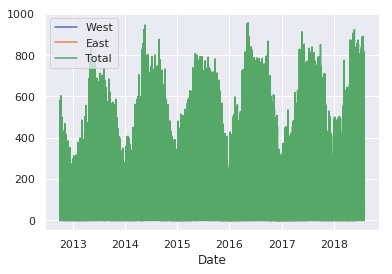

In [10]:
data.plot()

La unidad de medida por hora es demasiado densa para el estudio, por lo que vamos a realizar un resampling de los datos agregando semanalmente

In [11]:
# Agregamos los datos semanalmente y calculamos la suma
weekly = data.resample('W').sum()

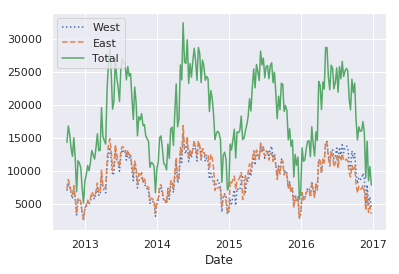

In [12]:
weekly['2012':'2016'].plot(style=[':', '--', '-'])

In [13]:
daily = data['2012':'2016'].resample('D').sum()

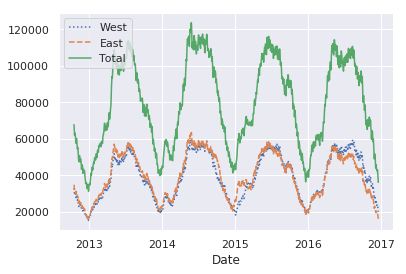

In [14]:
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])

In [15]:
monthly = data.resample('M').sum()

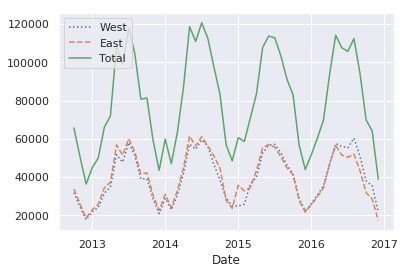

In [16]:
monthly['2012':'2016'].plot(style=[':', '--', '-'])

In [17]:
monthly.rolling?

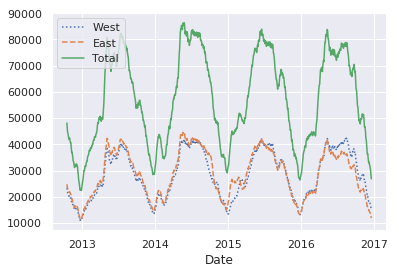

In [18]:
daily.rolling(30, win_type='gaussian', center=True).sum(std=10).plot(style=[':', '--', '-'])

In [20]:
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as pdr

In [21]:
gld = pdr.get_data_yahoo('GLD', '2016-11-08')

ImmediateDeprecationError: 
Yahoo Actions has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


#### Digging into the data

Vamos a ver como se comporta el tráfico en función de la hora del día

In [22]:
by_time = data.groupby(data.index.time).mean()

In [23]:
by_time

,West,East,Total
00:00:00,6.790883,5.266917,12.057801
01:00:00,3.407895,2.927632,6.335526
02:00:00,2.137541,2.100801,4.238342
03:00:00,1.396617,1.614192,3.010808
04:00:00,2.861372,3.558741,6.420113
05:00:00,9.327538,16.654605,25.982143
06:00:00,33.247650,57.761278,91.008929
07:00:00,75.421523,151.140508,226.562030
08:00:00,114.798872,201.892387,316.691259
09:00:00,77.481899,109.243065,186.724965


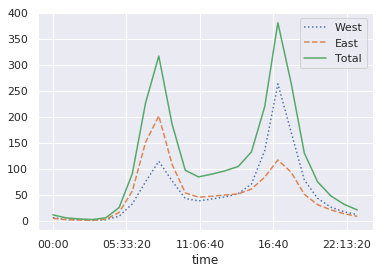

In [24]:
by_time.plot(style=[':', '--', '-'])

In [25]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)

In [26]:
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

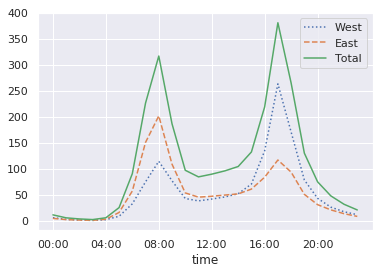

In [27]:
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

Vamos a ver como se comporta el tráfico en función del día de la 
semana

In [32]:
by_weekday = data.groupby(data.index.dayofweek).mean()


In [33]:
by_weekday

,West,East,Total
Date,,,
0,68.014254,61.593202,129.607456
1,72.809021,66.523033,139.332054
2,72.262061,65.439693,137.701754
3,67.646656,62.475466,130.122122
4,61.339183,56.302303,117.641486
5,29.705318,32.126508,61.831826
6,28.097380,31.108901,59.206282


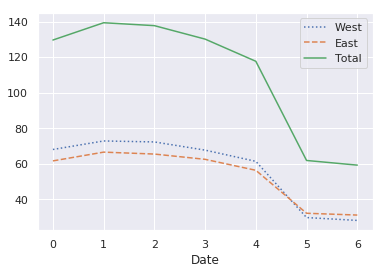

In [34]:
by_weekday.plot(style=[':', '--', '-'])

Vamos a ver si hay diferencias entre las horas y si es finde o no

In [39]:
# Creamos una agrupación en función de si es día normal o de finde
weekend = np.where(data.index.dayofweek < 5, 'Weekday', 'Weekend')

In [40]:
# Ahora agrupamos por si es normal o finde, y por las horas
by_time = data.groupby([weekend, data.index.time]).mean()

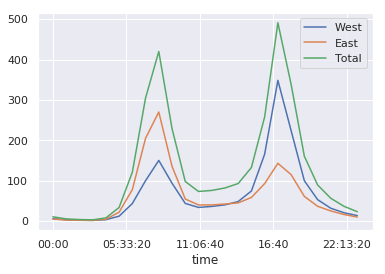

In [44]:
by_time.loc['Weekday'].plot()

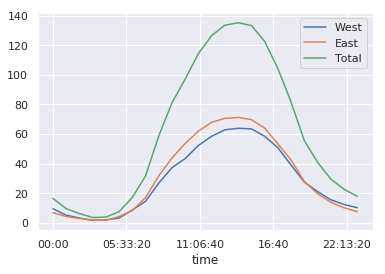

In [45]:
by_time.loc['Weekend'].plot()